In [1]:
from keras.layers import Input, Dense, Dropout, Activation, BatchNormalization, Flatten, Conv2D, MaxPooling2D
from keras.models import Sequential
from keras.utils import plot_model
from keras.preprocessing.image import ImageDataGenerator

Using TensorFlow backend.


In [2]:
test_dir="C:/DATASET/archive (4)/Alzheimer_s Dataset/test"
train_dir="C:/DATASET/archive (4)/Alzheimer_s Dataset/train"

In [3]:
data_generator = ImageDataGenerator(rescale = 1.0/255.0,validation_split = 0.1)

In [4]:
traindata = data_generator.flow_from_directory(directory=train_dir, target_size=(100, 100), batch_size=64, class_mode='categorical', shuffle = True, subset = 'training')
testdata = data_generator.flow_from_directory(directory=test_dir, target_size=(100, 100), batch_size=64, class_mode=None, shuffle = True)
validdata = data_generator.flow_from_directory(directory = train_dir,target_size = (100, 100),batch_size = 64,class_mode = 'categorical', shuffle = True, subset = 'validation')

Found 4610 images belonging to 4 classes.
Found 1279 images belonging to 4 classes.
Found 511 images belonging to 4 classes.


In [5]:
vgg_16_model=Sequential()

vgg_16_model.add(Conv2D(filters=64, kernel_size=(3,3), strides=(1,1), activation='relu', padding='same', input_shape=(100,100,3)))
vgg_16_model.add(BatchNormalization(momentum = 0.9))
vgg_16_model.add(Conv2D(filters=64, kernel_size=(3,3), strides=(1,1), activation='relu', padding='same'))
vgg_16_model.add(BatchNormalization(momentum = 0.9))
vgg_16_model.add(MaxPooling2D(pool_size=(2,2),strides=(2,2)))

vgg_16_model.add(Conv2D(filters=128, kernel_size=(3,3), strides=(1,1), activation='relu', padding='same'))
vgg_16_model.add(BatchNormalization(momentum = 0.9))
vgg_16_model.add(Conv2D(filters=128, kernel_size=(3,3), strides=(1,1), activation='relu', padding='same'))
vgg_16_model.add(BatchNormalization(momentum = 0.9))
vgg_16_model.add(MaxPooling2D(pool_size=(2,2),strides=(2,2)))

vgg_16_model.add(Conv2D(filters=256, kernel_size=(3,3), strides=(1,1), activation='relu', padding='same'))
vgg_16_model.add(BatchNormalization(momentum = 0.9))
vgg_16_model.add(Conv2D(filters=256, kernel_size=(3,3), strides=(1,1), activation='relu', padding='same'))
vgg_16_model.add(BatchNormalization(momentum = 0.9))
vgg_16_model.add(Conv2D(filters=256, kernel_size=(3,3), strides=(1,1), activation='relu', padding='same'))
vgg_16_model.add(BatchNormalization(momentum = 0.9))
vgg_16_model.add(MaxPooling2D(pool_size=(2,2),strides=(2,2)))

vgg_16_model.add(Conv2D(filters=512, kernel_size=(3,3), strides=(1,1), activation='relu', padding='same'))
vgg_16_model.add(BatchNormalization(momentum = 0.9))
vgg_16_model.add(Conv2D(filters=512, kernel_size=(3,3), strides=(1,1), activation='relu', padding='same'))
vgg_16_model.add(BatchNormalization(momentum = 0.9))
vgg_16_model.add(Conv2D(filters=512, kernel_size=(3,3), strides=(1,1), activation='relu', padding='same'))
vgg_16_model.add(BatchNormalization(momentum = 0.9))
vgg_16_model.add(MaxPooling2D(pool_size=(2,2),strides=(2,2)))

vgg_16_model.add(Conv2D(filters=512, kernel_size=(3,3), strides=(1,1), activation='relu', padding='same'))
vgg_16_model.add(BatchNormalization(momentum = 0.9))
vgg_16_model.add(Conv2D(filters=512, kernel_size=(3,3), strides=(1,1), activation='relu', padding='same'))
vgg_16_model.add(BatchNormalization(momentum = 0.9))
vgg_16_model.add(Conv2D(filters=512, kernel_size=(3,3), strides=(1,1), activation='relu', padding='same'))
vgg_16_model.add(BatchNormalization(momentum = 0.9))
vgg_16_model.add(MaxPooling2D(pool_size=(2,2),strides=(2,2)))

vgg_16_model.add(Flatten())
vgg_16_model.add(Dense(512, activation='relu'))
vgg_16_model.add(Dense(256, activation='relu'))
vgg_16_model.add(Dense(4, activation='softmax'))

In [6]:
vgg_16_model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 100, 100, 64)      1792      
_________________________________________________________________
batch_normalization_1 (Batch (None, 100, 100, 64)      256       
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 100, 100, 64)      36928     
_________________________________________________________________
batch_normalization_2 (Batch (None, 100, 100, 64)      256       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 50, 50, 64)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 50, 50, 128)       73856     
_________________________________________________________________
batch_normalization_3 (Batch (None, 50, 50, 128)      

In [7]:
vgg_16_model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [8]:
vgg_16_model.fit_generator(generator = traindata, steps_per_epoch = 20, validation_data = validdata,validation_steps = 128, epochs = 30)


Epoch 1/30
20/20 [==============================] - 30s 1s/step - loss: 3.3750 - accuracy: 0.4359 - val_loss: 4.8353 - val_accuracy: 0.5010
Epoch 2/30
20/20 [==============================] - 21s 1s/step - loss: 1.1412 - accuracy: 0.4581 - val_loss: 5.0505 - val_accuracy: 0.5010
Epoch 3/30
20/20 [==============================] - 20s 1s/step - loss: 0.9707 - accuracy: 0.5156 - val_loss: 0.9285 - val_accuracy: 0.5342
Epoch 4/30
20/20 [==============================] - 21s 1s/step - loss: 0.9012 - accuracy: 0.5344 - val_loss: 0.8218 - val_accuracy: 0.5264
Epoch 5/30
20/20 [==============================] - 20s 1s/step - loss: 0.8846 - accuracy: 0.5773 - val_loss: 6.6069 - val_accuracy: 0.5147
Epoch 6/30
20/20 [==============================] - 20s 1s/step - loss: 0.9390 - accuracy: 0.5115 - val_loss: 1.1048 - val_accuracy: 0.5460
Epoch 7/30
20/20 [==============================] - 21s 1s/step - loss: 0.9023 - accuracy: 0.5367 - val_loss: 0.9773 - val_accuracy: 0.5695
Epoch 8/30
20/20 [==

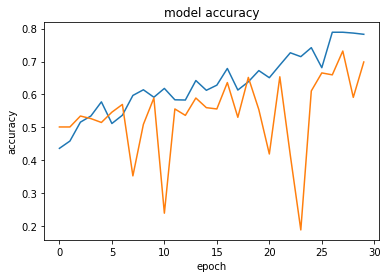

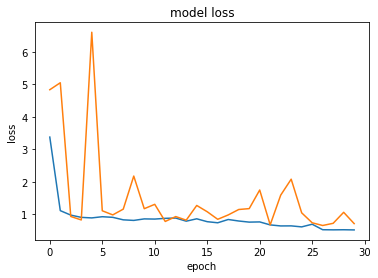

In [9]:
import matplotlib.pyplot as plt
plt.plot(vgg_16_model.history.history['accuracy'])
plt.plot(vgg_16_model.history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.show()

plt.plot(vgg_16_model.history.history['loss'])
plt.plot(vgg_16_model.history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.show()